In [4]:
try:       importlib.reload(Jupytils)
except:    import Jupytils
from Jupytils.Charts import *;
showTopbar("Markov Chain Asthma Prediction")

<IPython.core.display.Javascript object>

In [6]:
han1="http://www.smartconnectedhealth.org/aura/webroot/db.jsp?q=SELECT%20*%20FROM%20patient_data_table";
hand="http://www.smartconnectedhealth.org/aura/webroot/db.jsp?q=SELECT%20*%20FROM%20hand"
kimj="http://www.smartconnectedhealth.org/aura/webroot/db.jsp?q=SELECT%20*%20FROM%20kimj";
leeh="http://www.smartconnectedhealth.org/aura/webroot/db.jsp?q=SELECT%20*%20FROM%20leeh";
sony="http://www.smartconnectedhealth.org/aura/webroot/db.jsp?q=SELECT%20*%20FROM%20sony";
kuky="http://www.smartconnectedhealth.org/aura/webroot/db.jsp?q=SELECT%20*%20FROM%20kuky";
hand="http://www.smartconnectedhealth.org/aura/webroot/db.jsp?q=SELECT%20*%20FROM%20hand"
patient="leeh2"
patient="hand2"
hand2="http://www.smartconnectedhealth.org/aura/webroot/db.jsp?q=SELECT%20*%20FROM%20calculated_jlee%20WHERE%20pname=%27"+patient+"%27%20ORDER%20BY%20date,%20time"
fileName = hand2;

# => Load Data
proxies={'http':None, 'https':None}
df = LoadDataSet(fileName, checkForDateTime=False, proxies=proxies);
assert 'pef1' not in df.columns, "This must be old Data"
    
sdttm = df.date + " " + df.time 

if ('sdttm' not in df.columns):
    df.insert(0, 'sdttm', sdttm)
df.sdttm = pd.to_datetime(df.sdttm)

df.sort_values(by='sdttm', ascending=True, inplace=True)
drps  = "cname, time, date, timeofday, dateofmeasure, npt, pef1, pef2, pef3, pef, indexpef".split(', ')
df=df.drop(drps, axis=1, errors='ignore')
df=df.reset_index(drop=True)

#for c in df.columns:
#    if (c.find('avg') >0):
#        print (c)
dff1=df['sdttm ampm pef_zone so2_avg co_avg o3_avg no2_avg pm10_avg temperaturec windspeedms precipitationpercent vaporpressurehpa  airpressurehpa'.split()]
for i,u in enumerate(dff1.pef_zone.unique()):
    dff1.pef_zone[dff1.pef_zone == u]= i+1
dff1.pef_zone = dff1.pef_zone.astype(int)
df1=dff1
dfAM = df1[df1.ampm == 'am'].copy();
allDays = pd.date_range(dfAM.sdttm.min(), dfAM.sdttm.max(), freq='D')
dfAM.index=dfAM.sdttm;
dfAM=dfAM.reindex(allDays, method='ffill') #fill_value=0) #'bfill')
#dfAM


dfPM = df1[df1.ampm == 'pm'].copy();
allDays = pd.date_range(dfPM.sdttm.min(), dfPM.sdttm.max(), freq='D')
dfPM.index=dfPM.sdttm;
dfPM=dfPM.reindex(allDays, method='ffill') #fill_value=0) #'bfill')

dfAMp= dfAM.copy()
for c in dfAMp.columns:
    if (dfAMp[c].dtype == number):
        scaler = StandardScaler()
        dfAMp[c] = scaler.fit_transform(dfAMp[c])
dfAMp   
#dfAM

dfAMq= dfAM.copy()
for c in dfAMq.columns:
    if (dfAMq[c].dtype == number):
        nq = len(dfAM.pef_zone.unique())
        lnq=list(range(1,nq+1))
        s= pd.qcut(dfAMq[c], nq, labels=lnq )
        
        dfAMq[c] = s.astype(int)
dfAMq



,sdttm,ampm,pef_zone,so2_avg,co_avg,o3_avg,no2_avg,pm10_avg,temperaturec,windspeedms,precipitationpercent,vaporpressurehpa,airpressurehpa
2015-01-02 06:24:00,2015-01-02 06:24:00,am,1,1,2,1,1,1,1,2,1,1,2
2015-01-03 06:24:00,2015-01-02 06:24:00,am,1,1,2,1,1,1,1,2,1,1,2
2015-01-04 06:24:00,2015-01-03 07:19:00,am,1,2,2,1,1,1,1,1,1,1,2
2015-01-05 06:24:00,2015-01-05 06:08:00,am,1,2,2,1,2,2,1,1,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-10-16 06:24:00,2016-10-15 06:00:00,am,2,2,2,1,2,2,1,1,2,2,2
2016-10-17 06:24:00,2016-10-17 06:11:00,am,1,1,2,1,2,2,2,1,2,2,2
2016-10-18 06:24:00,2016-10-18 06:00:00,am,1,1,2,1,2,2,1,1,2,2,2
2016-10-19 06:24:00,2016-10-18 06:00:00,am,1,1,2,1,2,2,1,1,2,2,2


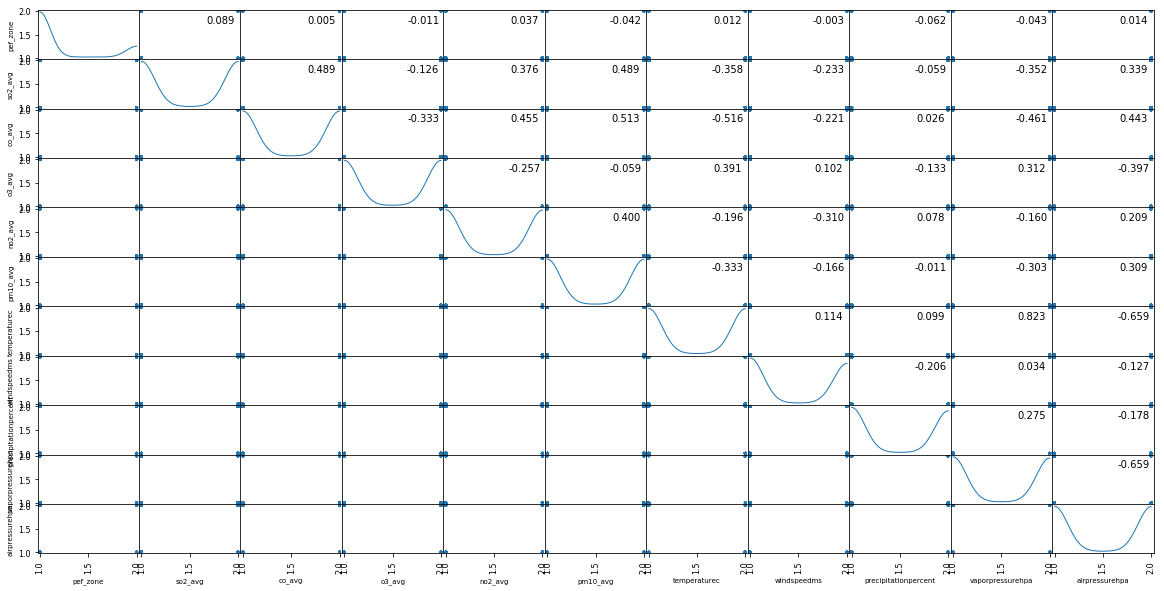

In [3]:
axes=scatter_matrix(dfAMq, alpha=0.2, diagonal='kde', figsize=(20, 10)); # diagonal can be 'hist';
corr = dfAMq.corr().as_matrix()
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')


In [658]:
def PlotHCts1(df, x, cols=[], div=None, title='', subtitle='', yTitle='',xTitle='', num=1000000,
          onClick='function(){g=this;console.log(g.index, g.y, g.x)}',
            animation='true', ctype=None):
    TS='''
<script>
Highcharts.chart('CHART_DIV', {
    chart: { type: 'line' ,  zoomType: 'x' },
    title: { text: 'CHART_TITLE' , zoomType:'xy' },
    subtitle: { text: 'CHART_SUB_TITLE' },
    xAxis: {type: 'datetime'
    },
    yAxis: {
        title: { text: 'CHART_Y_AXIS_TITLE'}
    },
    plotOptions: {
        scatter: {
            marker: { radius: 3},
            states: {
                hover: {
                    enabled: true,
                    lineColor: 'rgb(100,100,100)'
                }
            }
        },
        line: {
            animation: CHART_ANIMATION,
            dataLabels: {  enabled: false  },
            enableMouseTracking: true,
            lineWidth: 0.1,
            marker: { radius: 3} 
            },
            
            series: {
                point: {
                    events: {
                        click: CLICK_FUNCTION
                    }
                }
            }
        },
        DATA

});
</script>
'''
    
    ts ="";
    if ( div is None ):
        div = 'chart_' + str(np.random.randint(1000000))
        ts = '<div id="{}" style="height:200px"></div>\n'.format(div)
        
    if (type(x) == str):
        xa = df[x]
    elif (type(x) == int):
        xa = df[df.columns[x]]
    else: #(type(x) == pd.core.series.Series)
        xa = x
        
    if (len(xa) <=0 ): return;
    if (xa.astype(int)[0] > 1000000000000000000):
        dt=(xa.astype(int)/1000000)[0:num]
    elif (xa.astype(int)[0] > 1000000000000000):
        dt=(xa.astype(int)/1000)[0:num]
    else:
        dt = xa;
        
    dt = [int(c) for c in dt]
    dd=[]
    
    
    for c in cols:
        if ( type(c) == str):
            d=list(df[c].values[0:num])
            cn=c
        elif( type(c) == int ):
            cn=df.columns[c]
            d=list(df[cn].values[0:num])
        else:
            cn="List"
            d=c;
            
        dat=list(zip(dt, d))
        dd.append({'name': cn, 'data': dat })

    s = 'series: ' + pd.io.json.dumps(dd) +""
    ts= ts + TS.replace('DATA',s)
    ts=ts.replace('CHART_DIV', div)
    ts=ts.replace('CHART_TITLE', title)
    ts=ts.replace('CHART_SUB_TITLE', subtitle)
    ts=ts.replace('CHART_Y_AXIS_TITLE', yTitle)
    ts=ts.replace('CLICK_FUNCTION', onClick)
    ts=ts.replace('CHART_ANIMATION', animation)

    if (ctype != None):
        ts=ts.replace("type: 'line'","type: '{}'".format(ctype));
        
    display(HTML(ts))    
    return ts;

In [659]:
ddf=dfAMq;
PlotHCts1(ddf,  ddf.index, 'temperaturec windspeedms precipitationpercent vaporpressurehpa pef_zone'.split(' '), ctype='line', title="Sample Chart for "+ patient );

In [236]:
import random, shlex

class Markov:
    """An nth-Order Markov Chain class with some lexical processing elements."""
    def __init__(self, delim, order, n=10000):
        """Initialized with a delimiting character (usually a space) and the order of the Markov chain."""
        self.states = {}
        self.delim = delim
        self.max = n
        if order > 0:
            self.order = order
        else:
            raise Exception('Markov Chain order cannot be negative or zero.')

    def init_chain(self):
        """Helper function to generate the correct initial chain value."""
        init = []
        for i in range(self.order):
            init.append('');
        return tuple(init)

    def step(self, a, e):
        """Helper function that pops the end of tuple 'a' and tags on str 'e'."""
        d = a[1:] + (e,)
        return d
    
    def learn(self, sample):
        """Adds states to the dictionary; works best with sentences."""
        prev = self.init_chain()
        tokens = sample.split(self.delim)
        self.max = len(tokens)
        for t in tokens:
            if not prev in self.states:
                self.states[prev] = []
            curr = self.step(prev, t)
            self.states[prev].append(curr)
            prev = curr

    def learn_file(self, url):
        """Parses a text document sentence-wise using shlex and 'learns' each sentence."""
        f = open(url, 'r')
        s = shlex.shlex(f)
        t = s.get_token()
        sent = ''
        while t != None and t != '':
            t = t.replace('"', '').replace("'", '') \
                .replace('(','').replace(')','').replace('[','') \
                .replace(']','')
            if t.endswith('.') or t.endswith('!') or t.endswith('?'):
                sent = sent + t
                sent = sent + self.delim
                self.learn(sent)
                sent = ''
            else:
                sent = sent + t
                sent = sent + self.delim
            t = s.get_token()
        f.close()

    def query(self, n= None):
        """Queries the Markov chain with the default seed (defined by init_chain)."""
        if ( n is None): n = self.max
        tmp = self.init_chain()
        t = self.states[tmp][random.randint(0, len(self.states[tmp])-1)]
        sent = ''
        first = True
        i=0;
        while t in self.states and t != tmp and t != None:
            if not first:
                sent = sent + self.delim
            sent = sent + t[len(t)-1]
            t = self.states[t][random.randint(0, len(self.states[t])-1)]
            first = False
            #print(sent)
            i += 1
            if (i >= n):  
                break;
        return sent;  # + self.delim + "===" + t[len(t)-1]

    def ask(self, seed, n=None):
        """Queries the Markov chain with the seed of your choice (make sure it is an n-element list/tuple where n is the order of the chain)."""
        if ( n is None): n = self.max
        tmp = seed
        if not tmp in self.states.keys():
            tmp = self.init_chain()
        t = self.states[tmp][random.randint(0, len(self.states[tmp])-1)]
        sent = ''
        first = True
        #print(":"+ str(t), end='')
        i=0
        while t in self.states and t != tmp and t != None:
            #print('+', end='')
            if not first:
                sent = sent + self.delim
            sent = sent + t[len(t)-1]
            t = self.states[t][random.randint(0, len(self.states[t])-1)]
            first = False
            i += 1
            if (i > n):  
                print(len(sent), i)
                break;
                
        return sent; # + self.delim + t[len(t)-1]

In [755]:
pefs=' '.join(dfAMp.pef_zone.values.astype(str))
m=Markov(' ',28)
m.learn(pefs)
q=m.query()
#print("==>", len(pefs), len(q), q)
r = m.ask(tuple(''.split()), 900)

a=pefs
b=r
n=0;
t=0;
z = zip(a,b)
correctClass=defaultdict(int)
totalClass=defaultdict(int)
for c in z:
    totalClass[c[0]] += 1;
    
    if(c[0] == c[1]):
        correctClass[c[0]] += 1;
        t+= 1
    n += 1
    
print("Total %d, correct %d, acc: %3.2f"%(n,t,t/n))
for i,c in totalClass.items():
    acc = correctClass[i]/c
    print("class: {} total: {}, correct: {}, acc: {}".format(i, c, correctClass[i], acc))
        


1801 901
Total 1313, correct 1265, acc: 0.96
class:   total: 656, correct: 656, acc: 1.0
class: 1 total: 530, correct: 505, acc: 0.9528301886792453
class: 2 total: 127, correct: 104, acc: 0.8188976377952756


In [757]:
#len(r), len(pefs)


In [756]:
print(r, "===\n", pefs)

1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 2 2 1 1 2 1 1 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 1 1 2 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 2 1 2 1 1 2 1 2 1 1 1 1 1 1 2 1 2 1 1 1 1 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 2 1 1 1 1 1 1 2 2 1 1 2 2 1 2 1 1 1 2 2 1 1 1 2 2 1 1 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 2 1 1 2 2 2 2 1 2 1 1 1 1 2 2 2 1 1 2 2 1 1 1 2 1 1 2 1 1 1 2 2 1 2 2 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 2 2 2 1 1 1 2 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2 2 1 1 2 2 1 2 1 1 2 2 2 1 1 2 2 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 2 2 1 1 1 1 2 2 1 1 2 1 2 1 2 1 1 1 1 1 1 1 1 2 1 1 1 2 1 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

In [711]:
#pef= R R G G H H 
#so2= H H G G H H

SyntaxError: invalid syntax (<ipython-input-711-35461fe7d0f9>, line 1)